In [1]:
!pip install tensorflow keras numpy matplotlib opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 4.3 MB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 5.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Carregar o modelo VGG16 pré-treinado (com pesos do ImageNet)
model = VGG16(weights='imagenet')
model.summary() # Para ver a arquitetura do modelo

2025-07-11 09:28:34.892093: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-11 09:28:34.898477: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-11 09:28:34.950787: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-11 09:28:35.001830: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752236915.042221    8186 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752236915.05

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [219]:
# Caminho para sua imagem de teste
img_path = 'cats/7.png'

# Carregar a imagem e redimensioná-la para o tamanho esperado pelo VGG16 (224x224)
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) # Pré-processamento específico do VGG16 (normalização)

# Faça uma previsão com o modelo
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Predicted: [('n02123597', 'Siamese_cat', np.float32(0.9999306)), ('n02124075', 'Egyptian_cat', np.float32(6.11194e-05)), ('n02127052', 'lynx', np.float32(2.210835e-06))]


In [220]:
# Encontrar o índice da camada convolucional alvo
last_conv_layer_name = "block5_conv3"
last_conv_layer = model.get_layer(last_conv_layer_name)

# Crie um modelo que produza a saída da última camada convolucional E a previsão final
grad_model = tf.keras.models.Model(
    [model.inputs], [last_conv_layer.output, model.output]
)

# Obtenha o índice da classe prevista (a classe de interesse)
# Por exemplo, se a classe mais provável for "Labrador retriever", encontre seu índice.
# Você pode pegar o índice da primeira previsão (mais provável)
# Ex: predicted_class_id = np.argmax(preds[0])
# Ou, se quiser uma classe específica:
predicted_class_id = np.argmax(preds[0])

In [221]:
with tf.GradientTape() as tape:
    last_conv_layer_output, predictions = grad_model(x)
    class_channel = predictions[:, predicted_class_id]

# Calcule os gradientes da classe de interesse em relação à saída da última camada convolucional
grads = tape.gradient(class_channel, last_conv_layer_output)

# Pool os gradientes em todos os canais para obter um peso por canal
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Multiplique a saída da última camada convolucional pelos pesos dos gradientes
last_conv_layer_output = last_conv_layer_output[0]
heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# Normalizar o mapa de calor (opcional, mas recomendado para visualização)
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

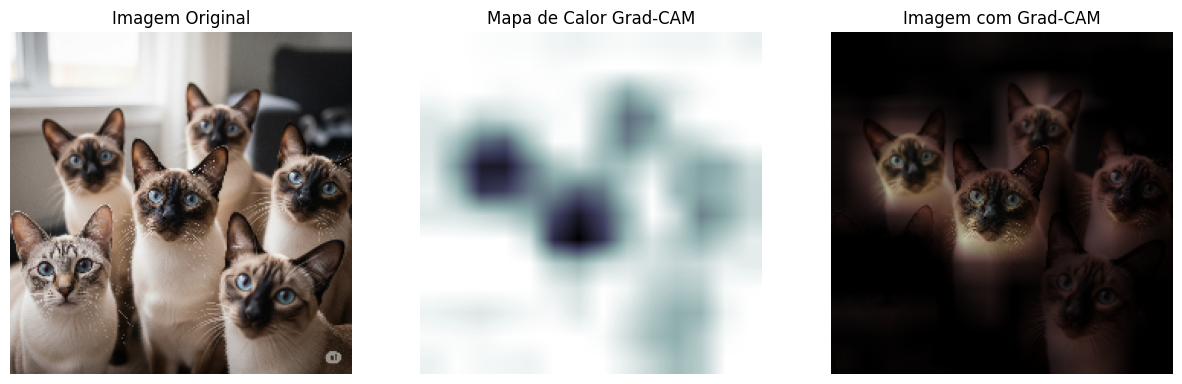

In [222]:
# Carregar a imagem original (para visualização)
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224)) # Redimensionar para o mesmo tamanho do processamento
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converter de BGR para RGB

# Redimensionar o mapa de calor para o tamanho da imagem original
heatmap = heatmap.numpy()
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# Converter o mapa de calor para um formato de 0-255 e aplicar um mapa de cores
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_BONE)

# Sobrepor o mapa de calor na imagem original
# Você pode ajustar o peso da sobreposição (alpha)
superimposed_img = (heatmap/255) * img
superimposed_img = np.uint8(superimposed_img)

# Exibir a imagem original, o mapa de calor e a imagem sobreposta
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(255-heatmap)
plt.title('Mapa de Calor Grad-CAM')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(superimposed_img)
plt.title('Imagem com Grad-CAM')
plt.axis('off')

plt.show()

In [579]:
# --- Adicionando Bounding Boxes ---

# Recarregar a imagem original para desenhar as bounding boxes
img_bgr = cv2.imread(img_path)
img_bgr = cv2.resize(img_bgr, (224, 224))

# Converter o mapa de calor para escala de cinza de 8 bits
heatmap_8bit = np.uint8(cv2.cvtColor(heatmap, cv2.COLOR_BGR2GRAY))


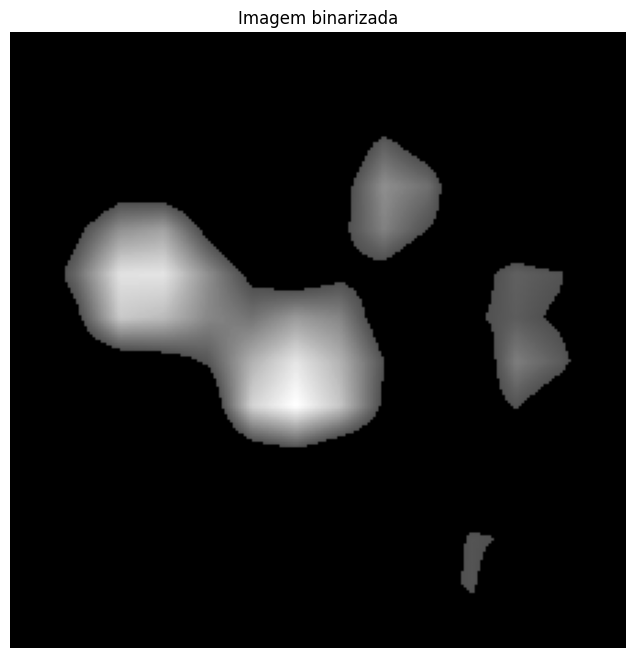

In [580]:


# Aplicar limiarização para obter uma imagem binária
# O valor do limiar pode precisar ser ajustado (ex: 128, 150, etc.)
# heatmap_8bit = cv2.GaussianBlur(heatmap_8bit, (5, 5), 0)
# ret, thresh = cv2.threshold(heatmap_8bit, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
heatmap_8bit[heatmap_8bit < 80] = 0

plt.figure(figsize=(8, 8))
plt.imshow(heatmap_8bit, cmap='gray')
plt.title('Imagem binarizada')
plt.axis('off')
plt.show()


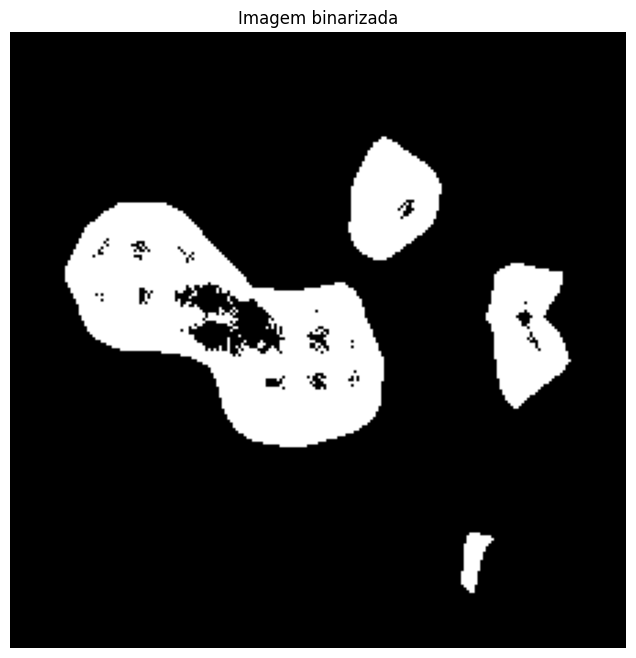

In [581]:
# blurred = cv2.GaussianBlur(heatmap_8bit, (7, 7), 0)
thresh = cv2.adaptiveThreshold(heatmap_8bit, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 0)
# thresh = cv2.adaptiveThreshold(heatmap_8bit, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)

plt.figure(figsize=(8, 8))
plt.imshow(thresh, cmap='gray')
plt.title('Imagem binarizada')
plt.axis('off')
plt.show()

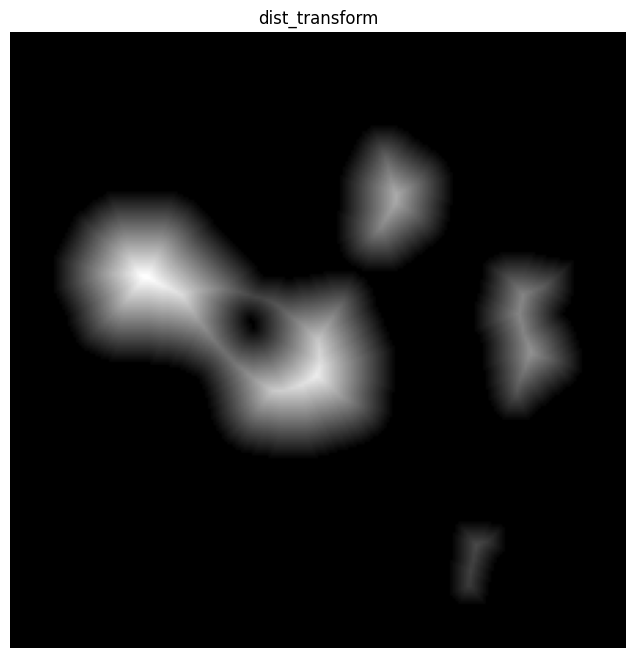

In [582]:
kernel_dil = np.ones((3,3), np.uint8) # Kernel pequeno para dilatação
img_dilate = cv2.dilate(thresh, kernel_dil, iterations=4)

dist_transform = cv2.distanceTransform(img_dilate, cv2.DIST_L2, 5) # Calcula a distância de cada pixel branco ao pixel preto mais próximo

plt.figure(figsize=(8, 8))
plt.imshow(dist_transform, cmap='gray')
plt.title('dist_transform')
plt.axis('off')
plt.show()

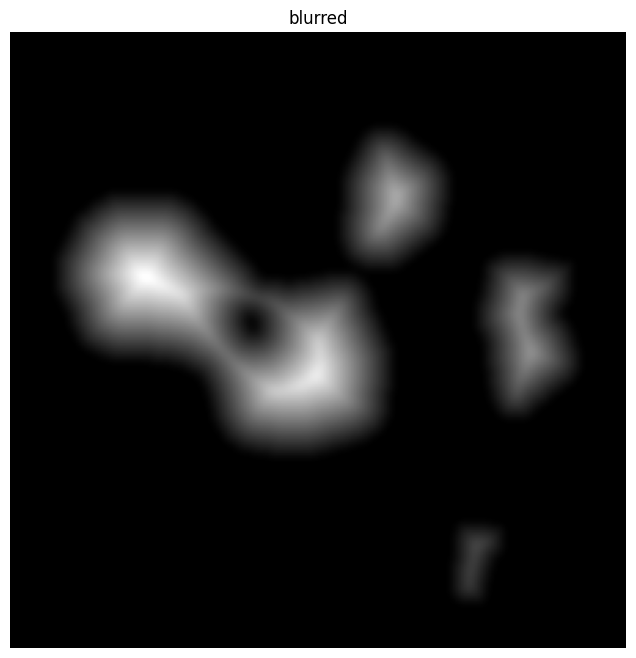

In [583]:
blurred = cv2.GaussianBlur(dist_transform, (7, 7), 0)

plt.figure(figsize=(8, 8))
plt.imshow(blurred, cmap='gray')
plt.title('blurred')
plt.axis('off')
plt.show()

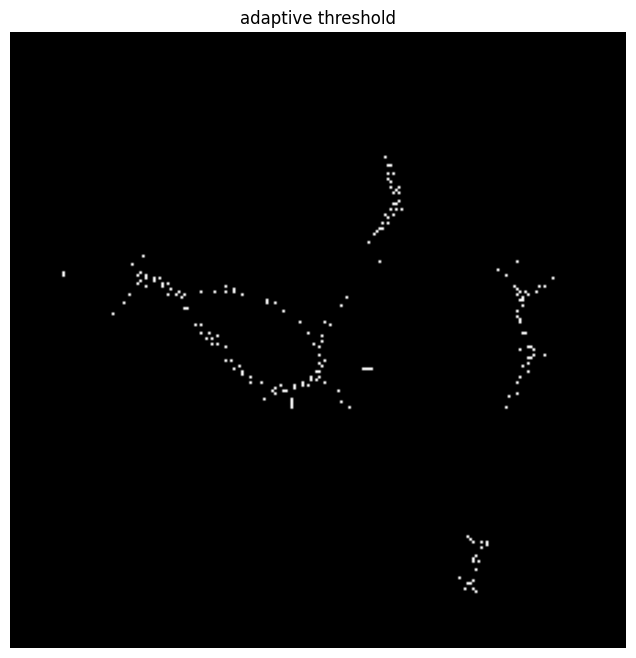

In [584]:
adapt = cv2.adaptiveThreshold(np.uint8(blurred), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 0)
# adapt = cv2.adaptiveThreshold(np.uint8(blurred), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)

plt.figure(figsize=(8, 8))
plt.imshow(adapt, cmap='gray')
plt.title('adaptive threshold')
plt.axis('off')
plt.show()

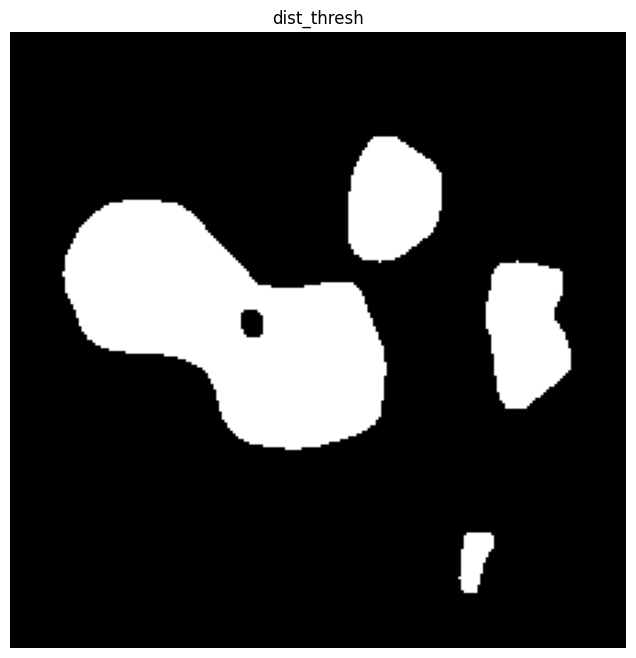

In [585]:
ret, dist_thresh = cv2.threshold(blurred.astype(np.uint8), 3, 255, cv2.THRESH_BINARY) # Limiariza a transformada de distância
# dist_thresh = cv2.adaptiveThreshold(dist_transform.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
unknown = cv2.subtract(sure_background, sure_foreground)

plt.figure(figsize=(8, 8))
plt.imshow(dist_thresh, cmap='gray')
plt.title('dist_thresh')
plt.axis('off')
plt.show()

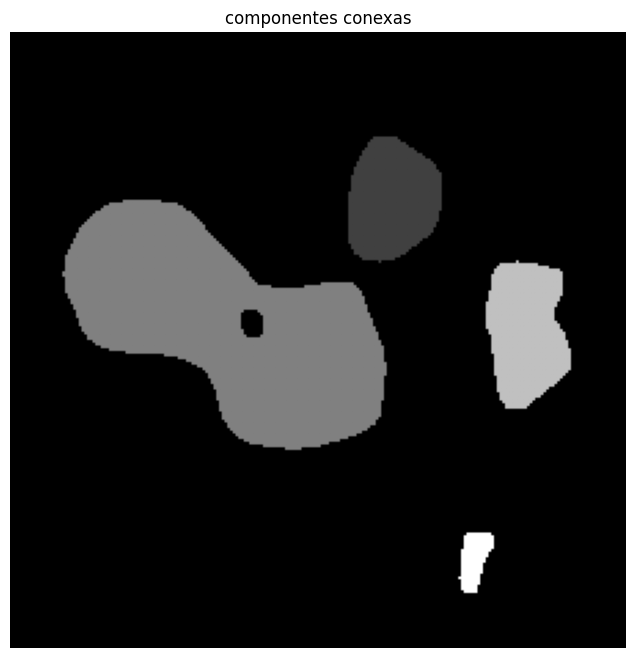

In [586]:


_, markers = cv2.connectedComponents(dist_thresh)

plt.figure(figsize=(8, 8))
plt.imshow(markers, cmap='gray')
plt.title('componentes conexas')
plt.axis('off')
plt.show()

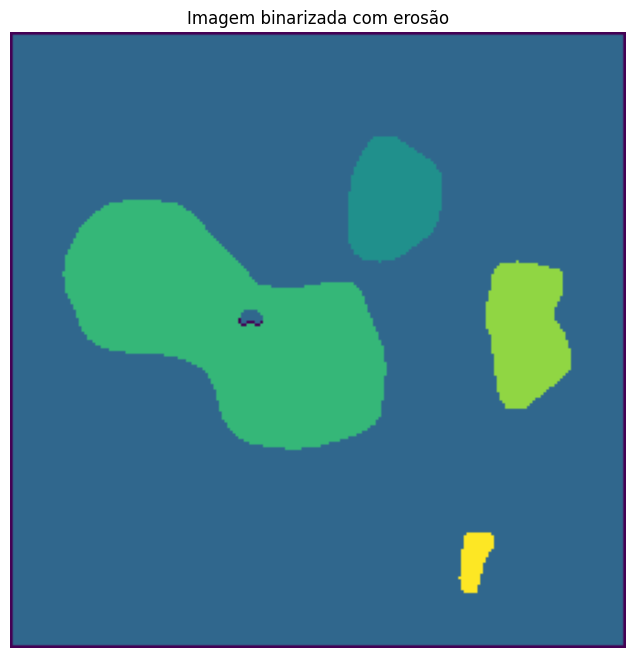

In [587]:
# --- 4. Marcação dos Marcadores ---
# Atribuir rótulos únicos para cada região conectada nos núcleos dos objetos.
# ret, markers = cv2.connectedComponents(sure_foreground)
# Incrementar todos os rótulos em 1 para que o fundo seja 1, não 0.
markers = markers + 1
# Definir a região desconhecida como 0 (para que a watershed a preencha).
markers[unknown == 255] = 0

markers = cv2.watershed(img, markers)

img[markers == -1] = [0, 0, 255] # Linhas de watershed em vermelho

plt.figure(figsize=(8, 8))
plt.imshow(markers)
plt.title('Imagem binarizada com erosão')
plt.axis('off')
plt.show()

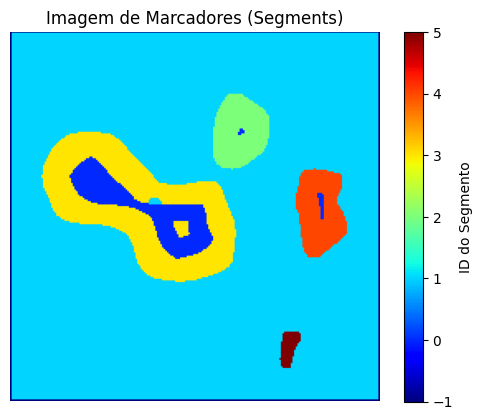

In [588]:
markers_display = markers.copy()
markers_display[unknown == 255] = 0 # Define as linhas de watershed como preto (ou outra cor de fundo)

# Também podemos querer garantir que o fundo (rótulo 1) seja preto (ou outra cor distinta).
# markers_display[markers == 1] = 0 # Opcional: Se você quiser que o fundo explícito (rótulo 1) seja preto também

# A visualização é melhor se os valores são mais dispersos para o colormap
# Se seus rótulos começarem em 1 (fundo), 2 (primeiro objeto), etc.
# Você pode normalizar ou simplesmente plotar.
# plt.imshow(markers_display, cmap='nipy_spectral') # 'nipy_spectral' é bom para muitos rótulos
plt.imshow(markers_display, cmap='jet') # 'jet' também é bom para visualizar as diferentes regiões

plt.title('Imagem de Marcadores (Segments)')
plt.axis('off')
plt.colorbar(label='ID do Segmento') # Adiciona uma barra de cores para referência
plt.show()


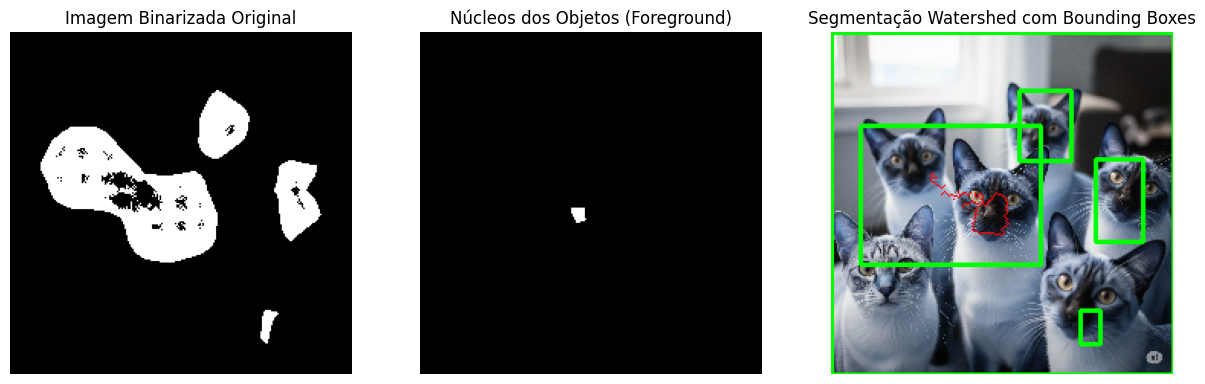

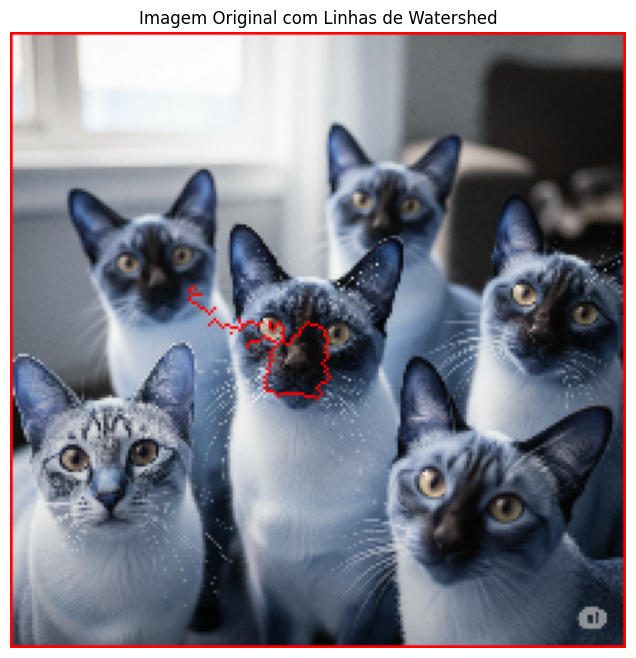

In [589]:
segmented_image_for_boxes = img.copy()
for label in np.unique(markers):
    if label == 0 or label == 1: # Ignorar fundo e região desconhecida
        continue
    # Criar uma máscara para cada objeto segmentado
    mask = np.zeros(markers.shape, dtype="uint8")
    mask[markers == label] = 255
    
    # Encontrar contornos na máscara do objeto
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours: # Garantir que contornos foram encontrados
        # Assumindo que queremos a maior área do contorno para o bounding box do objeto
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        if cv2.contourArea(c) > 1: # Filtrar pequenos ruídos
            cv2.rectangle(segmented_image_for_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2) # Bounding Box verde


# --- Visualizar o resultado ---
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Imagem Binarizada Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sure_foreground, cmap='gray')
plt.title('Núcleos dos Objetos (Foreground)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(segmented_image_for_boxes, cv2.COLOR_BGR2RGB))
plt.title('Segmentação Watershed com Bounding Boxes')
plt.axis('off')
plt.show()

# Opcional: Visualizar a imagem com as linhas de watershed
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original com Linhas de Watershed')
plt.axis('off')
plt.show()

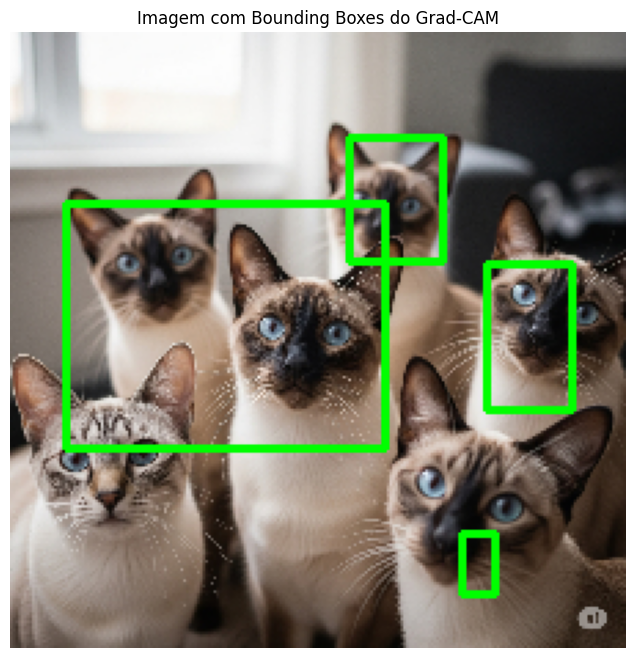

In [590]:

# Encontrar contornos no mapa de calor limiarizado
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Desenhar bounding boxes para os contornos encontrados
img_with_boxes = img_bgr.copy()
for cnt in contours:
    # Filtrar contornos pequenos (ajuste o valor de área conforme necessário)
    if cv2.contourArea(cnt) > 1:  # Exemplo: área mínima do contorno para ser considerado um objeto
        x, y, w, h = cv2.boundingRect(cnt)
        # Desenhar o retângulo delimitador (cor verde, espessura 2)
        cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Exibir a imagem com as bounding boxes
img_with_boxes_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(img_with_boxes_rgb)
plt.title('Imagem com Bounding Boxes do Grad-CAM')
plt.axis('off')
plt.show()